- Room 1: [Falkland Palace Royal Tennis Court](https://openairlib.net/?page_id=476)
- Room 2: [Genesis 6 Studio – Live Room Drum Set Up - snare position](https://openairlib.net/?page_id=483)
- Room 3: [The Shrine and Parish Church of All Saints North Street - altar to mid-left](https://openairlib.net/?page_id=644)

In [1]:
from itertools import product

from utils import *


plt.rcParams.update({'font.size': 16})


fs = 44100

/home/henriquemeloo/Projects/psi5720/rir-reverb-study/utils.py:34: RuntimeWarning: divide by zero encountered in log10
  ax.plot(w, 20*np.log10(np.abs(H)))
/home/henriquemeloo/Projects/psi5720/rir-reverb-study/utils.py:34: RuntimeWarning: divide by zero encountered in log10
  ax.plot(w, 20*np.log10(np.abs(H)))
/home/henriquemeloo/Projects/psi5720/rir-reverb-study/utils.py:34: RuntimeWarning: divide by zero encountered in log10
  ax.plot(w, 20*np.log10(np.abs(H)))
/home/henriquemeloo/Projects/psi5720/rir-reverb-study/utils.py:34: RuntimeWarning: divide by zero encountered in log10
  ax.plot(w, 20*np.log10(np.abs(H)))
/home/henriquemeloo/Projects/psi5720/rir-reverb-study/utils.py:34: RuntimeWarning: divide by zero encountered in log10
  ax.plot(w, 20*np.log10(np.abs(H)))
/home/henriquemeloo/Projects/psi5720/rir-reverb-study/utils.py:34: RuntimeWarning: divide by zero encountered in log10
  ax.plot(w, 20*np.log10(np.abs(H)))
/home/henriquemeloo/Projects/psi5720/rir-reverb-study/utils.py:3

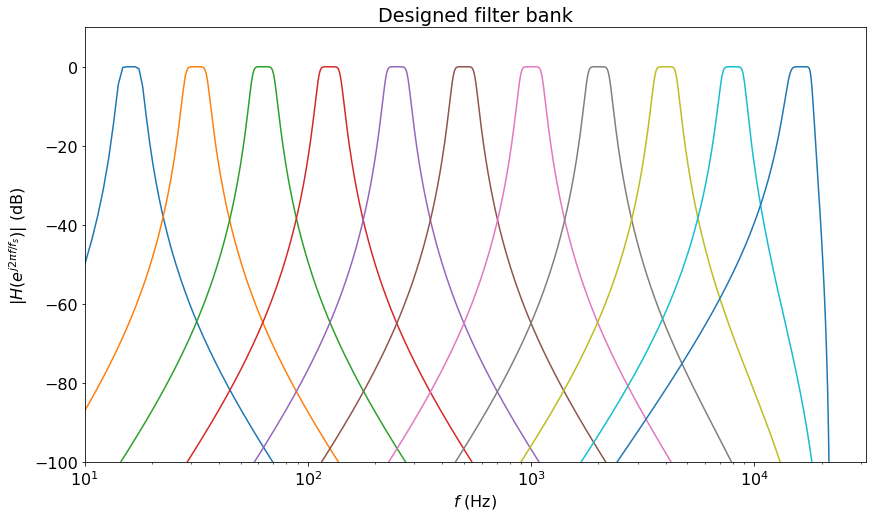

In [2]:
plot_filter_bank(fs)

In [4]:
fcs = [125, 250, 500, 1000, 2000, 4000]
rooms = ['1-tennis', '2-drums', '3-shrine']
t60 = pd.DataFrame(index=fcs, columns=rooms)
for room in rooms:
    rir = load_wav(f'./input/rir/{room}.wav', fs)
    for fc in fcs:
        t = calculate_t60(rir, fs, fc)
        t60.loc[fc, room] = t
    baseline = pd.read_csv(f'./input/rir/{room}.csv', usecols=['band', 't60'], index_col='band')
    t60 = t60.merge(baseline, left_index=True, right_index=True).rename(columns={
        't60': f'{room}_baseline'
    })
    t60[f'{room}_error'] = np.abs(t60[f'{room}'] - t60[f'{room}_baseline']) / t60[f'{room}_baseline']
t60

,1-tennis,2-drums,3-shrine,1-tennis_baseline,1-tennis_error,2-drums_baseline,2-drums_error,3-shrine_baseline,3-shrine_error
125,5.85088,0.27102,3.45365,5.19,0.127338,0.28,0.03207,18.76,0.815903
250,5.39161,0.298685,1.57306,5.61,0.0389287,0.27,0.10624,1.58,0.00439163
500,7.13814,0.215011,1.62698,6.41,0.113594,0.21,0.0238635,1.70,0.0429505
1000,6.18041,0.198095,1.79492,5.48,0.127812,0.19,0.0426065,1.74,0.0315636
2000,2.23515,0.226848,1.61773,2.16,0.0347905,0.21,0.0802289,1.62,0.00139974
4000,0.982222,0.254921,1.22385,1.09,0.0988787,0.22,0.15873,1.31,0.0657596


In [3]:
fcs = [125, 250, 500, 1000, 2000, 4000]
rooms = ['1-tennis', '2-drums', '3-shrine']
c80 = pd.DataFrame(index=fcs, columns=rooms)
for room in rooms:
    rir = load_wav(f'./input/rir/{room}.wav', fs)
    for fc in fcs:
        c = calculate_c80(rir, fs, fc)
        c80.loc[fc, room] = c
    baseline = pd.read_csv(f'./input/rir/{room}.csv', usecols=['band', 'c80'], index_col='band')
    c80 = c80.merge(baseline, left_index=True, right_index=True).rename(columns={
        'c80': f'{room}_baseline'
    })
    c80[f'{room}_error'] = np.abs(c80[f'{room}'] - c80[f'{room}_baseline']) / c80[f'{room}_baseline']
c80

,1-tennis,2-drums,3-shrine,1-tennis_baseline,1-tennis_error,2-drums_baseline,2-drums_error,3-shrine_baseline,3-shrine_error
125,0.510803,14.3121,0.0844034,3.24,0.842345,16.50,0.132597,-2.69,-1.03138
250,2.53454,16.9303,-2.99461,4.06,0.375729,20.03,0.154754,-3.92,-0.236068
500,1.46521,17.063,-1.65727,2.20,0.333994,23.87,0.285171,-2.04,-0.187611
1000,3.12743,22.7499,-1.35669,4.68,0.331746,26.00,0.125004,-4.18,-0.675433
2000,4.488,22.7003,-2.23277,6.66,0.326126,23.59,0.0377142,-3.44,-0.350939
4000,9.37373,20.8617,-1.34381,9.47,0.0101655,22.54,0.074458,-2.19,-0.386386


In [2]:
fcs = [125, 250, 500, 1000, 2000, 4000]
rooms = ['1-tennis', '2-drums', '3-shrine']
d50 = pd.DataFrame(index=fcs, columns=rooms)
for room in rooms:
    rir = load_wav(f'./input/rir/{room}.wav', fs)
    for fc in fcs:
        c = calculate_d50(rir, fs, fc)
        d50.loc[fc, room] = c
    baseline = pd.read_csv(f'./input/rir/{room}.csv', usecols=['band', 'd50'], index_col='band')
    d50 = d50.merge(baseline, left_index=True, right_index=True).rename(columns={
        'd50': f'{room}_baseline'
    })
    d50[f'{room}_error'] = np.abs(d50[f'{room}'] - d50[f'{room}_baseline']) / d50[f'{room}_baseline']
d50

,1-tennis,2-drums,3-shrine,1-tennis_baseline,1-tennis_error,2-drums_baseline,2-drums_error,3-shrine_baseline,3-shrine_error
125,-8.55143,-1.87412,-5.85058,0.57,16.0025,0.92,3.03708,0.16,37.5661
250,-3.29434,-0.416379,-9.42079,0.47,8.00923,0.94,1.44296,0.13,73.4676
500,-3.85246,-0.159793,-4.961,0.46,9.37491,0.98,1.16305,0.12,42.3416
1000,-1.90562,-0.166827,-6.79079,0.70,3.72231,0.97,1.17199,0.13,53.2369
2000,-2.02526,-0.160812,-6.38126,0.74,3.73683,0.97,1.16579,0.17,38.5368
4000,-2.89304,-0.179009,-5.41266,0.71,5.07471,0.97,1.18455,0.21,26.7746


In [7]:
br_tr = pd.DataFrame(columns=rooms, index=['BR', 'TR'])
for room in rooms:
    br_tr.loc['BR', room] = (
        (t60.loc[125, room] + t60.loc[250, room]) /
        (t60.loc[500, room] + t60.loc[1000, room])
    )
    br_tr.loc['TR', room] = (
        (t60.loc[2000, room] + t60.loc[4000, room]) /
        (t60.loc[500, room] + t60.loc[1000, room])
    )
br_tr

,1-tennis,2-drums,3-shrine
BR,0.844123,1.37908,1.46898
TR,0.241571,1.16621,0.830411
